<a href="https://colab.research.google.com/github/FredrikBL/xg-model/blob/main/ConorKody.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project**

###Creating an xG-model

William Assarsson, Fredrik Lindholm, Oscar Granström

#Introduction

This project was done as a part of the Database Technology course DD1334, Royal Institute of Technology, fall semester 2023

Database management systems (DBMS) are used to collect data in an organized structure which can then be accessed and managed by a user. The most common functions of a DBMS include:

*   Data modeling
*   Data storage and retrieval
*   Concurrency control
*   Data integrity and security
*   Backup and recovery

Database managements systems are often classified as either a relational database or a NoSQL database. In a relational database the data is structured as a table with columns and rows, the data is related through primary and foreign keys. A NoSQL database is designed to handle large-scale data where performance is more important. The data in this case is structured as key-value pairs. More on Database managements systems, [Introduction to Database Management Systems](https://www.geeksforgeeks.org/introduction-of-dbms-database-management-system-set-1/).

In this assignment the concerns regarding the database is primarily to structure data in an organized way, as well as being able to modify the underlying data, removing unnecessary data and inserting new data. This needs to be done in order to fullfill constraints presented by the model used for the machine learning training and testing.


##About xG

Expected Goals, also known  as xG is a performance metric used to objectivly assess the quality of a football shot, regardless of whether the shot results in a goal. Expected Goals models are usually created based on historical data, often derived from thousands of similiar shots, to determine the likelihood of a goal on a scale from 0-1. Therefore, an example is that a shot resulting in an xG of 0.3, is one that is generally expected to result in a goal three out of ten times.

Further reading about Exepected Goals available at [statsbombs website](https://statsbomb.com/soccer-metrics/expected-goals-xg-explained/).



##Project Foundations

This project uses Python in order to utilize existing modules for football data, plotting football pitches, machine learning models, widgets, math, and dataframes. This is the reasoning for using Python instead of any other programming language. Because the project was written in Python, Pandas Dataframes where used as a suitable form of database instead of other solutions such as SQL. It is possible to write SQL queries within Python, however the data which we obtained includes many different forms of data types such as nested lists which are more easily accessed and used through a Pandas Dataframe. The Pandas module also include many built in functions for quick and easy visualization, for example calculating the mean of differents columns grouped by a certain constraints or plotting the data as graphs. If embedded SQL queries were to have been used it would most likely have been converted to a Pandas Dataframe at certain points due to it's ease of use in terms of visulization. Using Python also meant that Google Colaboratory was a good way to write the code and text, and share it with others.


#Modules

Modules used throughout the notebook

In [ ]:
!pip install statsbombpy
!pip install mplsoccer
!pip install sklearn
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 826.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 kB 798.3 kB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsbombpy import sb
from mplsoccer import Pitch, VerticalPitch
from ipywidgets import widgets
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Data

##Data Used

The data was originally obtained through Statsbombs open data. The data used in the training and testing of the xg-model in the first part of the project consists of the following leagues: Bundesliga, La Liga, Ligue 1, Premier League, and Serie A; with the data being from the 2015/2016 season. All of the events were accessed via the Statsbomb API which resulted in a dataframe consisting of 6.39 million rows and 117 columns. The data was then filtered to only include the shots and not any other events which reduces the size to (45720, 117). The dataframe was then saved to an Apache Parquet file on 4/10/23. The last parts of the project uses the statsbomb API directly to access match id:s for the 2022 World Cup matches and then access events from individual matches.

In [ ]:
github_url = 'https://github.com/FredrikBL/xg-model/raw/main/match_events_shots.parquet'

df = pd.read_parquet(github_url)

print(df.shape)
df.head()

(45720, 117)


,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,carry_end_location,clearance_aerial_won,...,team,team_id,timestamp,type,under_pressure,goalkeeper_lost_in_play,half_end_early_video_end,player_off_permanent,goalkeeper_penalty_saved_to_post,goalkeeper_saved_to_post
0,None,None,None,None,None,None,None,None,None,None,...,Hoffenheim,175,00:04:21.052,Shot,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None,None,None,...,Schalke 04,181,00:06:27.395,Shot,None,None,None,None,None,None
2,None,None,None,None,None,None,None,None,None,None,...,Hoffenheim,175,00:08:16.762,Shot,True,None,None,None,None,None
3,None,None,None,None,None,None,None,None,None,None,...,Schalke 04,181,00:13:55.721,Shot,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None,None,...,Schalke 04,181,00:17:16.953,Shot,None,None,None,None,None,None


##Data Modification

**Update or change the data thats used**

The model can be trained on any of the other leagues and seasons available through Statsbomb, note that every league and season is not available freely, see more at [statsbomb/free-data](https://statsbomb.com/what-we-do/hub/free-data/). The leagues and seasons may also differ in what kind of events are available which could throw an error in the code below if columns are missing or similar. Statsbomb could make changes to the data used, in which case the same leagues and seasons used originally could be downloaded again, see date above in the Data Used section.

The data can be accessed in the code below, note that trying to access all five leagues at the same time will likely not work in Colab, but can be done in other notebook environments. Colab works better when limited to only accessing one league and season. If you want to change to different leagues and season from those saved in the dictionary use:



```
sb.competitions()
```

This will give an overview of the data available freely from Statsbomb.



```
'''
Code to run if you want to change or update the data being used
'''

LEAGUES = {
    'Germany': '1. Bundesliga',
    #'Spain' : 'La Liga',
    #'France' : 'Ligue 1',
    #'England' : 'Premier League',
    #'Italy' : 'Serie A'
}

df = pd.DataFrame()

for leagues in LEAGUES.items():
  events = pd.DataFrame(sb.competition_events(leagues[0], leagues[1], '2015/2016', 'male'))
  df = pd.concat([df, events], axis=0)

df = df[df['type'] == 'Shot'].reset_index(drop=True)

df.head()
```



# Constants


Variables used in the data preparation. COLUMNS_TO_DROP is for the data used in Training and Testing while COLUMNS_TO_KEEP are used for the data in User-Selected Match Evaluation. The variables can be changed if desired, but that may also require changes to the code.

In [ ]:
COLUMNS_TO_DROP = ['50_50',
                  'bad_behaviour_card',
                  'ball_receipt_outcome',
                  'ball_recovery_offensive',
                  'ball_recovery_recovery_failure',
                  'block_deflection',
                  'block_offensive',
                  'block_save_block',
                  'carry_end_location',
                  'clearance_aerial_won',
                  'clearance_body_part',
                  'clearance_head',
                  'clearance_left_foot',
                  'clearance_other',
                  'clearance_right_foot',
                  'counterpress',
                  'dribble_no_touch',
                  'dribble_nutmeg',
                  'dribble_outcome',
                  'dribble_overrun',
                  'duel_outcome',
                  'duel_type',
                  'duration',
                  'foul_committed_advantage',
                  'foul_committed_card',
                  'foul_committed_offensive',
                  'foul_committed_penalty',
                  'foul_committed_type',
                  'foul_won_advantage',
                  'foul_won_defensive',
                  'foul_won_penalty',
                  'goalkeeper_body_part',
                  'goalkeeper_end_location',
                  'goalkeeper_lost_in_play',
                  'goalkeeper_lost_out',
                  'goalkeeper_outcome',
                  'goalkeeper_penalty_saved_to_post',
                  'goalkeeper_position',
                  'goalkeeper_punched_out',
                  'goalkeeper_saved_to_post',
                  'goalkeeper_shot_saved_off_target',
                  'goalkeeper_shot_saved_to_post',
                  'goalkeeper_success_in_play',
                  'goalkeeper_success_out',
                  'goalkeeper_technique',
                  'goalkeeper_type',
                  'half_end_early_video_end',
                  'half_start_late_video_start',
                  'id',
                  'index',
                  'injury_stoppage_in_chain',
                  'interception_outcome',
                  'location',
                  #'match_id',
                  'minute',
                  'miscontrol_aerial_won',
                  'off_camera',
                  'out',
                  'pass_aerial_won',
                  'pass_angle',
                  'pass_assisted_shot_id',
                  'pass_body_part',
                  'pass_cross',
                  'pass_cut_back',
                  'pass_deflected',
                  'pass_end_location',
                  'pass_goal_assist',
                  'pass_height',
                  'pass_inswinging',
                  'pass_length',
                  'pass_miscommunication',
                  'pass_no_touch',
                  'pass_outcome',
                  'pass_outswinging',
                  'pass_recipient',
                  'pass_shot_assist',
                  'pass_straight',
                  'pass_switch',
                  'pass_technique',
                  'pass_through_ball',
                  'pass_type',
                  'period',
                  'play_pattern',
                  #'player',
                  'player_id',
                  'player_off_permanent',
                  'position',
                  'possession',
                  'possession_team',
                  'possession_team_id',
                  'related_events',
                  'second',
                  'shot_aerial_won',
                  'shot_body_part',
                  'shot_deflected',
                  'shot_end_location',
                  #'shot_first_time',
                  'shot_follows_dribble',
                  'shot_freeze_frame',
                  'shot_key_pass_id',
                  'shot_one_on_one',
                  'shot_open_goal',
                  #'shot_outcome',
                  'shot_redirect',
                  'shot_saved_off_target',
                  'shot_saved_to_post',
                  #'shot_statsbomb_xg',
                  #'shot_technique',
                  #'shot_type',
                  'substitution_outcome',
                  'substitution_replacement',
                  'tactics',
                  #'team',
                  'team_id',
                  'timestamp',
                  'type',
                  #'under_pressure'
                   ]


COLUMNS_TO_KEEP = ['team',
                  'x_loc',
                  'y_loc',
                  'shot_outcome',
                  'shot_first_time',
                  'under_pressure',
                  'shot_technique',
                  'shot_type'
                   ]

TRAINING_PARAMETERS = ['shot_first_time',
                      'under_pressure',
                      'shot_technique',
                      'shot_type',
                      'distance_to_goal',
                      'angle_to_goal'
                       ]



#xG-model


##Data Preparation and Parameters

The data contains all the shots taken from the 5 major European leagues 2015/2016. This data includes several unnecessary columns which are removed below. Some of the data also need to be reformatted in order to work with the machine learning model. Two new values: distance and angle are created using the players location and the location of the goal.

In [ ]:
def calc_distance(x_loc, y_loc):
  return np.sqrt((120 - x_loc) * (120 - x_loc) + (40 - y_loc) * (40 - y_loc))

def calc_angle(x_loc, y_loc):
  if x_loc==120:
    if y_loc > 36 and y_loc < 44:
      return 180
    else:
      return 0
  else:
    return np.degrees(np.arccos(((64 - (120 - x_loc)**2 - (36 - y_loc)**2 - (120 - x_loc)**2 - (44 - y_loc)**2) /
    (-2 * np.sqrt((120 - x_loc)**2 + (36 - y_loc)**2) * np.sqrt((120 - x_loc)**2 + (44 - y_loc)**2)))))

In [ ]:
def format(df):
    df['shot_outcome'] = np.where(df['shot_outcome'] == 'Goal', 1, 0)
    df['shot_first_time'] = np.where(df['shot_first_time'] == True, 1, 0)
    df['under_pressure'] = np.where(df['under_pressure'] == True, 1, 0)
    df['shot_technique'] = pd.factorize(df['shot_technique'])[0]
    df['shot_type'] = np.where(df['shot_type'] == 'Penalty', 1, 0)

    df['distance_to_goal'] = df.apply(lambda row:calc_distance(row['x_loc'], row['y_loc']), axis=1)
    df['angle_to_goal'] = df.apply(lambda row:calc_angle(row['x_loc'], row['y_loc']), axis=1)

    return df

In [ ]:
df[['x_loc', 'y_loc']] = pd.DataFrame(df['location'].tolist(), index=df.index)
df = format(df)
df.drop(COLUMNS_TO_DROP, axis=1, inplace=True)
df.head()

,match_id,player,shot_first_time,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,team,under_pressure,x_loc,y_loc,distance_to_goal,angle_to_goal
0,3890561,Tarik Elyounoussi,1,0,0.087901,0,0,Hoffenheim,0,108.1,31.2,14.800338,25.119534
1,3890561,Klaas-Jan Huntelaar,1,1,0.160274,1,0,Schalke 04,0,110.9,42.6,9.464143,44.698590
2,3890561,Kevin Volland,1,0,0.016036,0,0,Hoffenheim,1,117.9,29.1,11.100450,8.905109
3,3890561,Jean-Eric Maxim Choupo-Moting,0,1,0.527759,2,0,Schalke 04,0,101.8,27.6,22.022716,17.246839
4,3890561,Klaas-Jan Huntelaar,0,0,0.074020,2,0,Schalke 04,0,109.3,26.5,17.226143,16.956907


The parameters used to train and test the xG-model are:
*   Shot type
> Describes wheter the shot was from open play, freekick, penalty, and corner. This value is reformated above as a 1 when it's a penalty and 0 otherwise.
*   Shot technique
> One of the following: Half Volley, Volley, Normal, Lob, Backheel, Overhead Kick, or Diving Header. They are reformated as integer values.
*   Shot first time
> If the player shoots directly or has received the ball previously. Either True or None, which is changed to 1 or 0.
*   Under pressure
> If the player taking the shot is being pressured by an opposing player while taking the shot, True or None, changed to 1 or 0.
*   Distance to goal
> Not a feature available from the Statsbomb data, but can be calculated using distance in R2. Described further below.
*   Angle to goal
> Also not a set feature of the data set but can be calculated using trigonometric functions. Described more in detail below.
*   Shot outcome
> The result of the shot, one of the following: Off T, Goal, Blocked, Saved, Wayward, Post, Saved Off Target, Saved to Post. This is reformatted as a 1 if it's a goal or 0 if not. Used as the target vector in training and testing.




Text(1, 32, 'Red equals shots missed, green markers show shots converted')

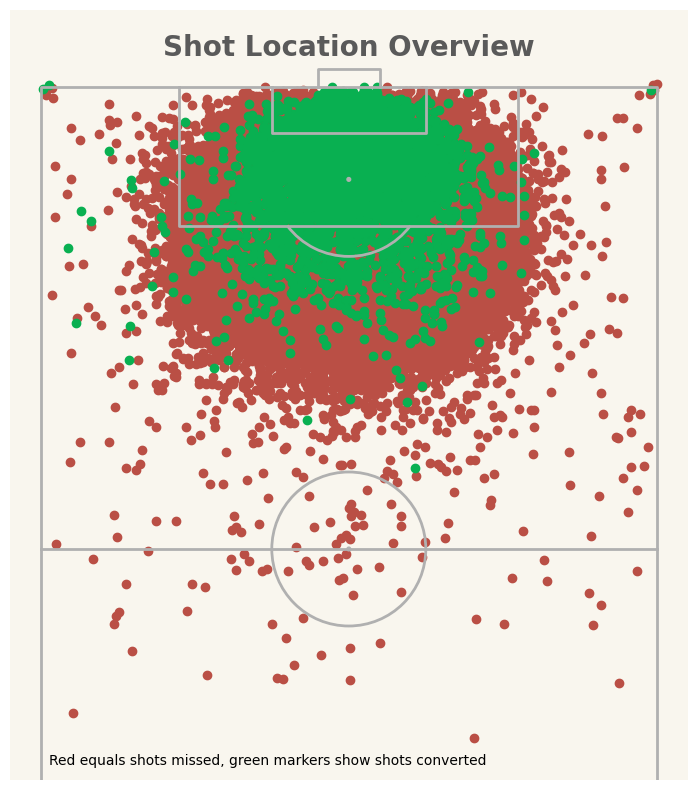

In [ ]:
goals = df[df['shot_outcome'] == 1].copy()
misses = df[df['shot_outcome'] == 0].copy()

pitch = VerticalPitch(pitch_type='statsbomb', half=True, pitch_color='#F9F6EE', goal_type='box', line_zorder=2, pad_bottom=30, pad_top=10)

fig, ax = pitch.draw(figsize=(10,10), constrained_layout=True, tight_layout=False)

misses_scatter = pitch.scatter(misses['x_loc'], misses['y_loc'], color='#BA4F45', marker='o', ax=ax)
goals_scatter = pitch.scatter(goals['x_loc'], goals['y_loc'], color='#09B051', marker='o', ax=ax)

ax.text(x=40, y=125, s=f'Shot Location Overview', size=20, color='#5A5A5A', va='center', ha='center', weight='bold')
ax.text(x=1, y=32, s='Red equals shots missed, green markers show shots converted', size=10)

Plot above shows all shot locations from the data set. It shows that most goals are from shots closer to goal.

Text(62, 10, 'Goal locations without penalties')

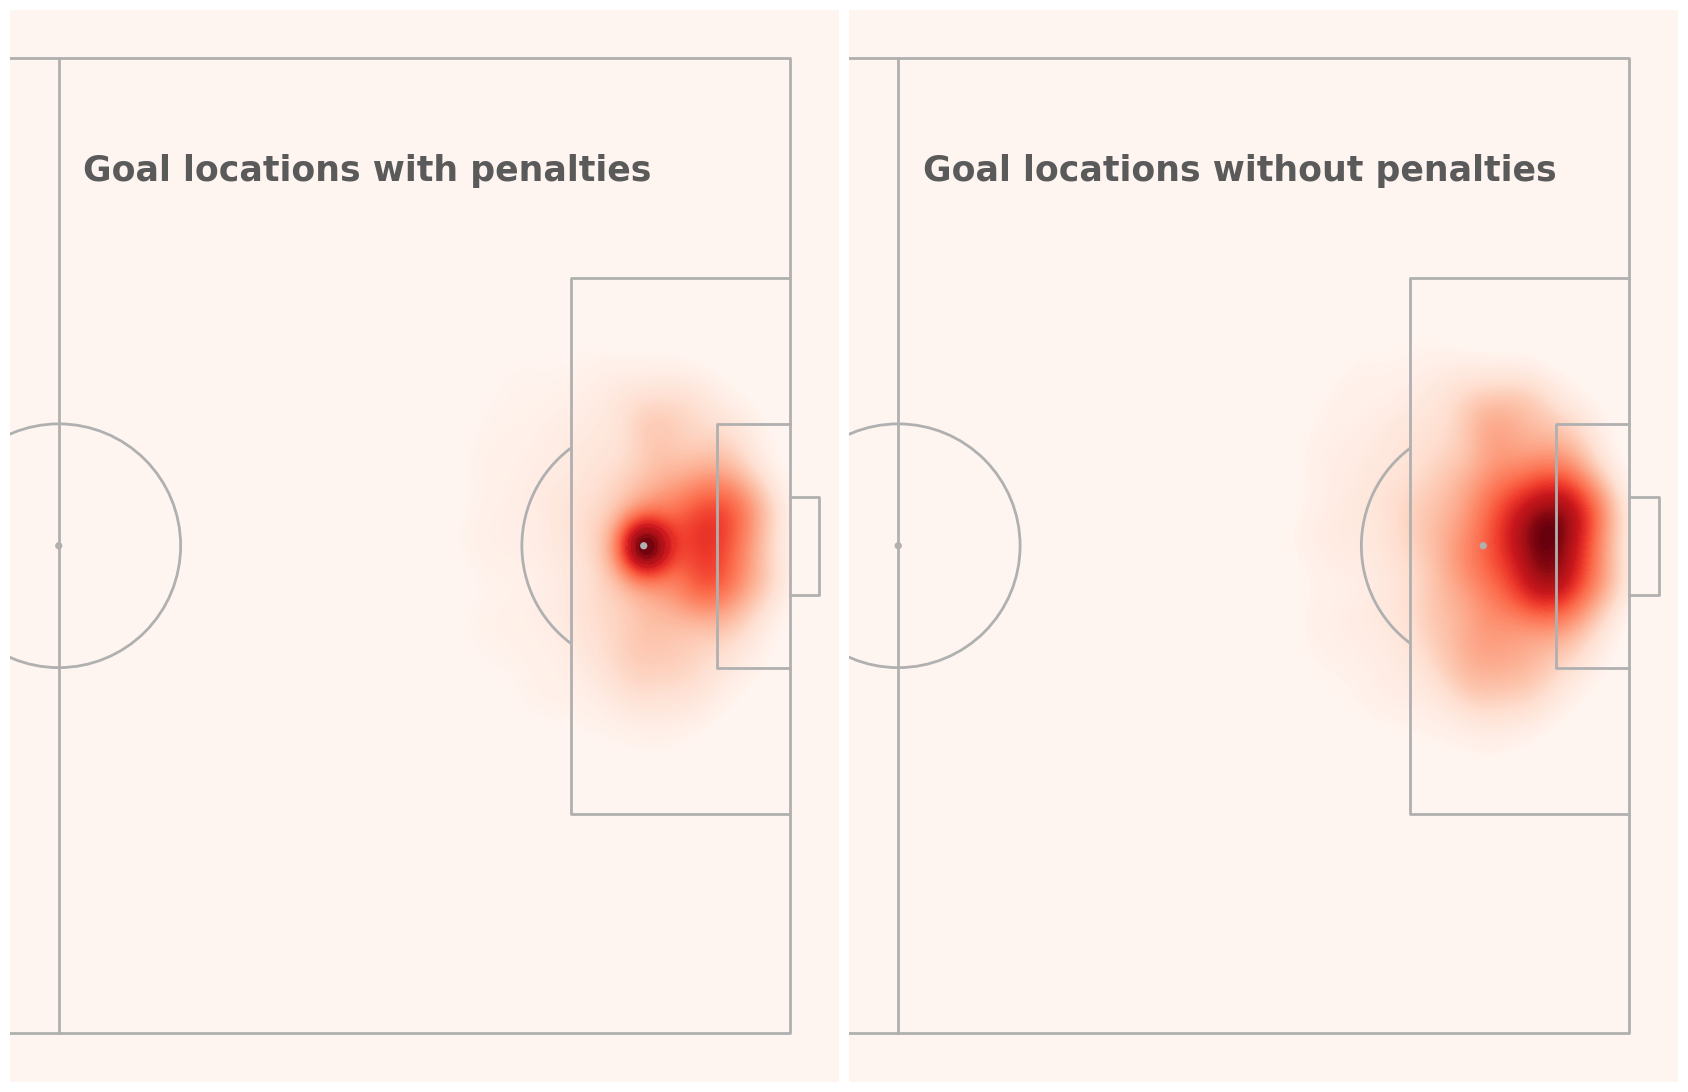

In [ ]:
goals = df[df['shot_outcome'] == 1].copy()
goals_wo_pens = goals[goals['shot_type'] == 0].copy()

pitch = Pitch(pitch_type='statsbomb', half=True, pitch_color='#FFF5F0', line_zorder=2, goal_type='box')

fig, ax = pitch.grid(nrows=1, ncols=2, axis=False, figheight=15, space=0.01, endnote_height=0, title_height=0)

heatmap1 = pitch.kdeplot(goals['x_loc'], goals['y_loc'], ax=ax[0], cmap='Reds', fill=True, shade_lowest=False, n_levels=100)
heatmap2 = pitch.kdeplot(goals_wo_pens['x_loc'], goals_wo_pens['y_loc'], ax=ax[1], cmap='Reds', fill=True, shade_lowest=False, n_levels=100)

ax[0].text(x=62, y=10, s=f'Goal locations with penalties', size=25, color='#5A5A5A', weight='bold')
ax[1].text(x=62, y=10, s=f'Goal locations without penalties', size=25, color='#5A5A5A', weight='bold')

The plot shows the locations of all goals scored in our data set. The first one with penalties and the second one without. Compared to the plot above this one gives a better indication of the areas where most goals are scored.

Text(65, 10, 'Angle to goal')

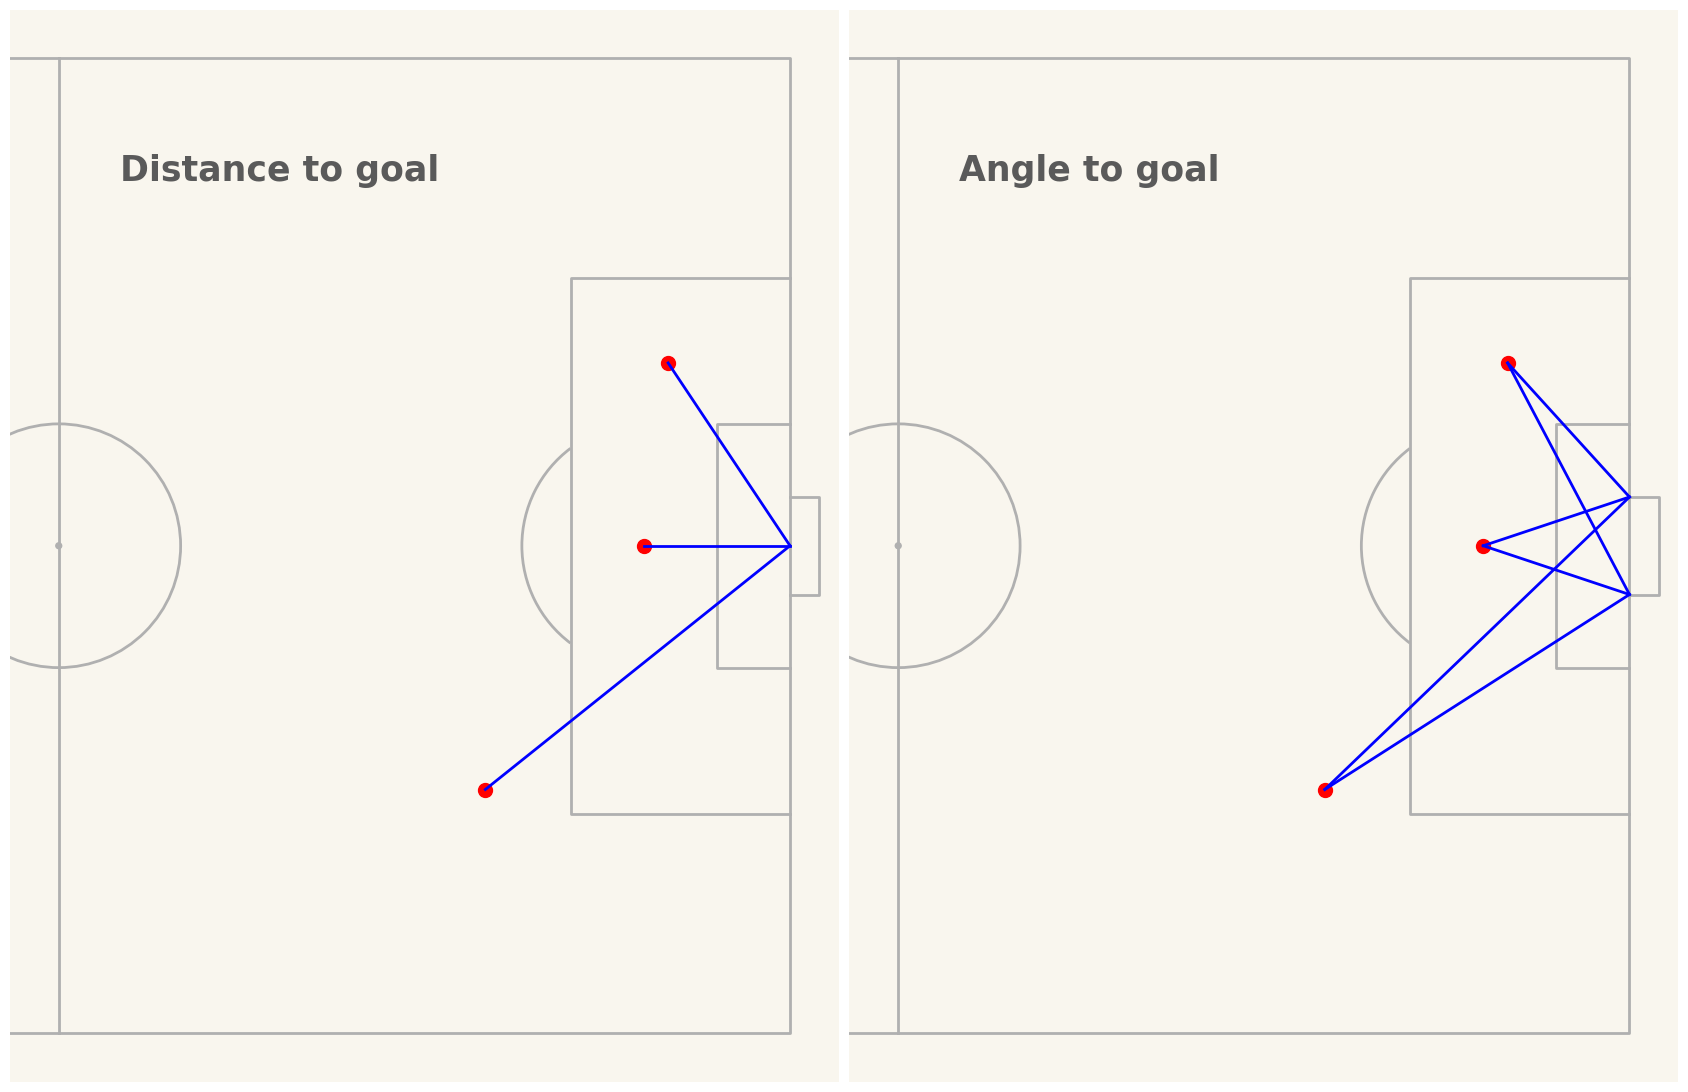

In [ ]:
pitch = Pitch(pitch_type='statsbomb', half=True, pitch_color='#F9F6EE', goal_type='box')

fig, ax = pitch.grid(nrows=1, ncols=2, axis=False, figheight=15, space=0.01, endnote_height=0, title_height=0)

shot_locations = [(108, 40), (95, 60), (110, 25)]
centre_of_goal = (120, 40)
left_goal_post = (120, 36)
right_goal_post = (120, 44)

for x, y in shot_locations:
    pitch.scatter(x, y, c='red', s=100, ax=ax[0])
    ax[0].plot([x, centre_of_goal[0]], [y, centre_of_goal[1]], color='blue', linestyle='-', linewidth=2)

for x, y in shot_locations:
    pitch.scatter(x, y, c='red', s=100, ax=ax[1])
    ax[1].plot([x, left_goal_post[0]], [y, left_goal_post[1]], color='blue', linestyle='-', linewidth=2)
    ax[1].plot([x, right_goal_post[0]], [y, right_goal_post[1]], color='blue', linestyle='-', linewidth=2)

ax[0].text(x=65, y=10, s=f'Distance to goal', size=25, color='#5A5A5A', weight='bold')
ax[1].text(x=65, y=10, s=f'Angle to goal', size=25, color='#5A5A5A', weight='bold')

The locations in the plot above are examples of how distance and angle can look for shots taken from three different locations.

Distance to goal is calculated using the [euclidean distance formula for R2](https://en.wikipedia.org/wiki/Euclidean_distance). The points from which the distance is calculated are the shot location and the centre of the goal. Taking a shot further away from the goal should result in lesser probability of shot conversion which is why it's included in the training of the xg-model.

The angle towards goal is calculated using the [law of cosine](https://en.wikipedia.org/wiki/Law_of_cosines). The locations that make up the points of the triangle are: the shot location, left goal post location, and right goal post location. From the locations above it's clear that the angle decreases when the shot is taken further away from goal, and when the shot is taken from either side of the goal. The angle towards goal gives an indication of how easy it is to hit the goal which is why it was included in the xG-model training.

The table below shows the mean distance and angle for shots and shots converted. It shows a significant difference in distance and angle for goals scored and shots missed.

In [ ]:
df[['shot_outcome', 'shot_statsbomb_xg', 'distance_to_goal', 'angle_to_goal']].groupby('shot_outcome').mean()

,shot_statsbomb_xg,distance_to_goal,angle_to_goal
shot_outcome,,,
0,0.077139,20.184303,23.419864
1,0.300490,12.950694,38.787248


##Training and Testing

This project uses logistic regression as classification for the xG-model. This was chosen above other existing methods due to its simplicity and because it is used for binary classification such as shot outcome.

In [ ]:
def train_xg(X_train, y_train):

    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)

    return logreg

def calc_xg(X_test, y_test, logreg):

    y_pred = logreg.predict(X_test)
    y_pred_proba = logreg.predict_proba(X_test)[:,1]

    return y_pred, y_pred_proba

In [ ]:
X = df[['shot_first_time', 'under_pressure', 'shot_technique', 'shot_type', 'distance_to_goal', 'angle_to_goal',  'shot_statsbomb_xg']]
y = df[['shot_outcome']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg=train_xg(X_train[TRAINING_PARAMETERS], y_train)
y_pred, y_pred_proba = calc_xg(X_test[TRAINING_PARAMETERS], y_test, logreg)

xg_test = pd.DataFrame.merge(y_test, X_test, left_index=True, right_index=True).reset_index(drop=True)
xg_test['our_xg'] = y_pred_proba
xg_test['our_pred'] = y_pred

xg_test.head()


,shot_outcome,shot_first_time,under_pressure,shot_technique,shot_type,distance_to_goal,angle_to_goal,shot_statsbomb_xg,our_xg,our_pred
0,0,0,1,2,0,24.224987,14.685003,0.011985,0.024896,0
1,1,0,0,2,0,7.558439,52.908307,0.324168,0.269818,0
2,0,0,0,2,0,25.342849,10.776562,0.010043,0.033662,0
3,0,1,0,2,0,19.593111,17.160058,0.078878,0.082882,0
4,0,0,1,2,0,16.924834,26.152583,0.065897,0.055852,0


Above is an excerpt of the dataframe which shows some xG-values from Statsbomb and from our xG-model in the column next to it.

In [ ]:
statsbomb_pred = pd.DataFrame()
statsbomb_pred['statsbomb_pred'] = (xg_test['shot_statsbomb_xg'] >= 0.5).astype(int)

table = [['Statsbomb\'s xG-model:', accuracy_score(y_test, statsbomb_pred).round(5)],
         ['Our xG-model:', accuracy_score(y_test, y_pred).round(5)]]

print(f'Accuracy score from {len(xg_test)} data points')

print(tabulate(table, tablefmt='fancy_grid'))

xg_test[['shot_outcome', 'shot_statsbomb_xg', 'our_xg']].groupby('shot_outcome').mean()

Accuracy score from 9144 data points
╒═══════════════════════╤═════════╕
│ Statsbomb's xG-model: │ 0.91032 │
├───────────────────────┼─────────┤
│ Our xG-model:         │ 0.90497 │
╘═══════════════════════╧═════════╛


,shot_statsbomb_xg,our_xg
shot_outcome,,
0,0.074648,0.086336
1,0.299253,0.233296


The accuracy score in binary classification shows the proportion of correct predictions against all predictions made,
[more on accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision#In_binary_classification). Statsbomb's score is 0.91 which means that it correctly classifes 91% of all shots, our model has very similar performance with 90.5%. This shows that our model works well even though it can produce individual xG-values that differ considerably compared to Statsbomb's.

Looking at the average xG for goals and misses our model does show a quite significant difference compared to Statsbomb's, we were still satisfied with the results due to the accuracy score of our model.

#User-Selected Match Evaluation



This section allows for selecting individual matches from the 2022 World Cup in the widget below. The data is reformated and xG-values are calculated for all of the shots. The shots are then plotted on a pitch showing how many good chances each team had, and how many goals they scored.

In [ ]:
wc = sb.matches(competition_id=43, season_id=106)
matches = {}

for index, row in wc.iterrows():
  home_team = row['home_team']
  away_team = row['away_team']
  match_id = row['match_id']
  key = f'{home_team} Vs {away_team}'
  matches[key] = match_id

options = list(matches.keys())

match_list = widgets.Combobox(
    placeholder ='Select a match',
    options=options,
    description='Select match:',
    ensure_option=True,
    disabled=False
)

match_list

Combobox(value='', description='Select match:', ensure_option=True, options=('Serbia Vs Switzerland', 'Argenti…

In [ ]:
match_id = match_list.value
matches[match_id]
match_events = sb.events(match_id=matches[match_id])

match_events = match_events[match_events['type'] == 'Shot'].reset_index(drop=True)
match_events[['x_loc', 'y_loc']] = pd.DataFrame(match_events['location'].tolist(), index=match_events.index)

teams = match_id.split(' Vs ')
team1 = teams[0]
team2 = teams[1]

match_events = match_events[match_events['period'] != 5]
match_events=match_events[COLUMNS_TO_KEEP]

match_events = format(match_events)

match_shots = match_events[TRAINING_PARAMETERS]
match_goals = match_events[['shot_outcome']]

y_pred, y_pred_proba = calc_xg(X_test=match_shots, y_test=match_goals, logreg=logreg)

match_test = pd.DataFrame.merge(match_goals, match_shots, left_index=True, right_index=True).reset_index(drop=True)
match_test['our_xg'] = y_pred_proba
match_test['team'] = match_events['team']
match_test[['x_loc', 'y_loc']] = match_events[['x_loc', 'y_loc']]

team1_events = match_test[match_test['team'] == team1]
team2_events = match_test[match_test['team'] == team2]



Text(98, 77, 'Shots taken: 10\nTotal xG: 1.99\nGoals: 3')

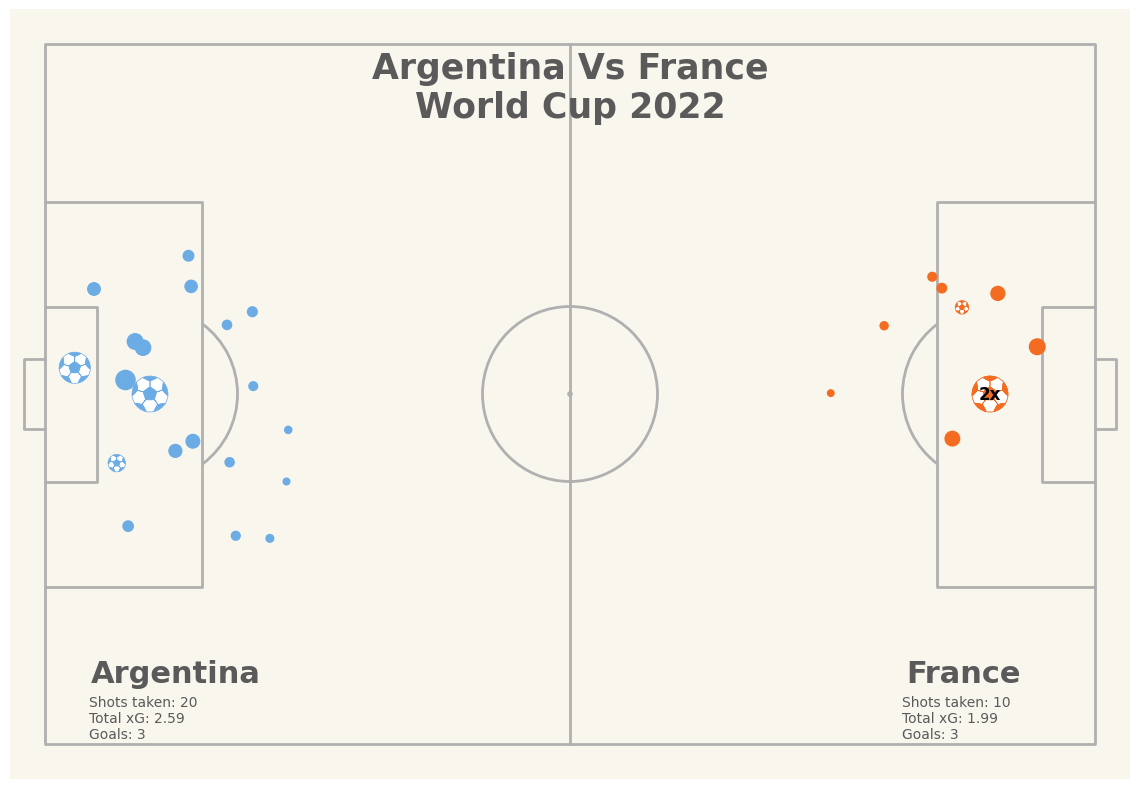

In [ ]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#F9F6EE', goal_type='box')
fig, ax = pitch.draw(figsize=(12,8))

team1_goal=(team1_events[team1_events['shot_outcome'] == 1])
team1_miss=(team1_events[team1_events['shot_outcome'] == 0])
team2_goal=(team2_events[team2_events['shot_outcome'] == 1])
team2_miss=(team2_events[team2_events['shot_outcome'] == 0])

team1_penalties = len(team1_goal[team1_goal['shot_type'] == 1])
team2_penalties = len(team2_goal[team2_goal['shot_type'] == 1])

pitch.scatter(120-team1_miss['x_loc'], 80-team1_miss['y_loc'], s=(team1_miss['our_xg'] * 1000), c='#6CACE4', marker='o', ax=ax)
pitch.scatter(120-team1_goal['x_loc'], 80-team1_goal['y_loc'], s=(team1_goal['our_xg'] * 1000), edgecolors='#6CACE4', c='#FFFFFF', marker='football', ax=ax)
if team1_penalties > 1:
  ax.text(x=12, y=40, s=f'{team1_penalties}x', c='#000000', va='center', ha='center', weight='bold', size=12)

pitch.scatter(team2_miss['x_loc'], team2_miss['y_loc'], s=(team2_miss['our_xg'] * 1000), c='#F36C21', marker='o', ax=ax)
pitch.scatter(team2_goal['x_loc'], team2_goal['y_loc'], s=(team2_goal['our_xg'] * 1000), edgecolors='#F36C21', c='#FFFFFF', marker='football', ax=ax)
if team2_penalties > 1:
  ax.text(x=108, y=40, s=f'{team2_penalties}x', c='#000000', va='center', ha='center', weight='bold', size=12)

ax.text(x=60, y=5, s=f'{team1} Vs {team2}\nWorld Cup 2022', size=25, color='#5A5A5A',va='center', ha='center', weight='bold')

ax.text(x=15, y=72, s=team1, size=22, color='#5A5A5A',va='center', ha='center', weight='bold')
ax.text(x=105, y=72, s=team2, size=22, color='#5A5A5A',va='center', ha='center', weight='bold')

ax.text(x=5, y=77, s=f'Shots taken: {len(team1_events)}\nTotal xG: {round(team1_events["our_xg"].sum(), 2)}\nGoals: {len(team1_goal)}', color='#5A5A5A',va='center', ha='left')
ax.text(x=98, y=77, s=f'Shots taken: {len(team2_events)}\nTotal xG: {round(team2_events["our_xg"].sum(), 2)}\nGoals: {len(team2_goal)}', color='#5A5A5A',va='center', ha='left')


#Results, Insights, and Future Considerations

Our xG-model produced individual and average scores which differed somewhat from the model used by Statsbomb. Our model did however perform well in terms of accuracy score and we therefore felt that it performed to a sufficient level. Improvements could be made to the model, for example evaluating the performance of different types of Machine Learning models. We used Logistic regression since it is a model that is meant to classify binary outcomes, such as whether or not a shot will result in a goal or not. The parameters used could also be evaluated, distance and angle probably has a bigger impact on the classification then the other parameters. Other parameters could also be introduced such as the location of the goalkeeper and number of players between the shot taker and the goal. The location of the goalkeeper would probably improve the model since a shot taken from far out, or from a difficult angle is much easier to convert if the keeper is misplaced. Other players in between the shot taker and the goal would probably also improve the model since a shot taken from a good position with a large angle towards the goal isn’t as easy if there are a lot of players blocking the shot effectively reducing the angle.

xG is already a widely used metric in football with many different models being used and viewers of a game being able to see xG-scores for shots effectively in real time with data being collected throughout a game. This project could therefore be further worked on to collect real time data from matches to give the viewer a better understanding of the ongoing match. Access to this type of data is however more difficult to get access to due to the companies collecting this type of data only giving it out to selected partners. Another way to extend this project could be to instead choose a different metric that isn’t as widely implemented already, for example analyzing the probability of a play structure leading to a shot, and in such a way analyze if a teams strategy yields results on the pitch.




#Lab Assignment

The mathematical foundation for query languages consists of set theory, first order logic and formal language theory.

Set theory is the mathematical way of dealing with collections of objects. When comparing datasets in sql there are three important operations:
Union: All objects in two collections of objects.

Intersection: The objects from the two collections which are the same.

Difference: The objects from collection A that is not in collection B and vice versa.
[Set theory](https://www.sqlshack.com/learn-sql-set-theory/).

First order logic is a system that is used to represent and reason about statements considering objects and their properties.  

Formal language theory is the way a computer program language is structured, with syntax rules and other constraints.

The SQL queries below show another way to use the data to compare Statsbombs xG-model to our own. When doing this earlier as part of the project it only required one line of code:
```
xg_test[['shot_outcome', 'shot_statsbomb_xg', 'our_xg']].groupby('shot_outcome').mean()
```
This is partly because we already had the dataframe and didn't need to create a new SQLite database but also because built in functions already exists for calculating average and grouping by a certain value.



In [ ]:
import sqlite3
con = sqlite3.connect('xg_test.db')
c = con.cursor()
xg_test.to_sql('xg_test', con, if_exists='append', index=False)

c.execute('''
SELECT 'Miss' AS Outcome, AVG(shot_statsbomb_xg) AS Statsbomb_xg_average, AVG(our_xg) AS Our_xg_average
FROM xg_test
WHERE shot_outcome = 0;
''')
result_0 = c.fetchall()

c.execute('''
SELECT 'Goal' AS Outcome, AVG(shot_statsbomb_xg) AS Statsbomb_xg_average, AVG(our_xg) AS Our_xg_average
FROM xg_test
WHERE shot_outcome = 1;
''')
result_1 = c.fetchall()

result = result_0 + result_1

result_df = pd.DataFrame(result, columns=['Outcome', 'Statsbomb_xg_average', 'Our_xg_average'])

con.close()

result_df

,Outcome,Statsbomb_xg_average,Our_xg_average
0,Miss,0.074648,0.086336
1,Goal,0.299253,0.233296


There are some implications from the constraints which an SQLite database has. Creating an SQLite database from our existing Pandas Dataframe means that we won’t have to accommodate for values being Null and such since we know how the Dataframe looks having worked with it previously. We also know that all the datatypes that remain in our Dataframe are supported by SQLite, if we would have left the columns containing nested lists, dictionaries and timestamps they would likely cause errors in the code, or change the datatype. Since the queries we wrote  are quite simple we didn’t bother too much with the structure of the database. The queries could perhaps have been written more efficiently if the structure was better suited. The same goes for the retrieval of data from the database, it is also impacted by the structure of the database.

In the earlier stages of the project we implemented SQL queries when preparating the data for the machine learning. This worked well and the code can be seen below. However doing the data preparation in Python was easier especially writing functions for the processes that are repeated.



```
c.execute('''ALTER TABLE shots ADD distance_to_goal REAL;''')

c.execute('''ALTER TABLE shots ADD angle_to_goal REAL;''')

c.execute('''UPDATE shots SET distance_to_goal = (sqrt((120 - x_loc) * (120 - x_loc) + (40 - y_loc) * (40 - y_loc)))''')

c.execute('''UPDATE shots SET angle_to_goal =
            CASE
                WHEN x_loc = 120 THEN
                    CASE
                        WHEN y_loc > 36 AND y_loc < 44 THEN 180
                        ELSE 0
                    END
                ELSE DEGREES(ACOS(
                    ((64 - POWER(120 - x_loc, 2) - POWER(36 - y_loc, 2) - POWER(120 - x_loc, 2) - POWER(44 - y_loc, 2)) /
                    (-2 * SQRT(POWER(120 - x_loc, 2) + POWER(36 - y_loc, 2)) * SQRT(POWER(120 - x_loc, 2) + POWER(44 - y_loc, 2))))))
            END
            ''')


c.execute('''UPDATE shots
            SET shot_outcome = CASE
            WHEN shot_outcome = 'Goal' THEN 1
            ELSE 0
            END;
            ''')

c.execute('''UPDATE shots
            SET under_pressure = CASE
            WHEN under_pressure = '1' THEN 1
            ELSE 0
            END;
            ''')

c.execute('''UPDATE shots
            SET shot_first_time = CASE
            WHEN shot_first_time = '1' THEN 1
            ELSE 0
            END;
            ''')


con.commit()

shots = pd.read_sql_query("SELECT * FROM shots", con)

con.close()
```

